In [2]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        np.random.seed(1)
        
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        for iteration in range(training_iterations):
            output = self.think(training_inputs)

            error = training_outputs - output
            
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    neural_network = NeuralNetwork()

    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)

    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    neural_network.train(training_inputs, training_outputs, 15000)

    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)

    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!")

Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
User Input One: 4
User Input Two: 7
User Input Three: 3
Considering New Situation:  4 7 3
New Output data: 
[1.]
Wow, we did it!


In [3]:
def nonlin(x, deriv=False):
    if(deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [4]:
x = np.array([
    [0,0,1], 
    [0,1,1], 
    [0,1,0], 
    [1,1,1]
])
y = np.array([[0,0,1,1]]).T

In [6]:
np.random.seed(1)
w0 = 2 * np.random.random((3,1))-1
for iter in range(10):
    l0 = x
    l1 = np.dot(l0, w0)
    l1 = nonlin(l1)
    l1_error = y-l1
    delta_l1 = l1_error * nonlin(l1,True)
    w0 = w0 + np.dot(l0.T, delta_l1)
print("End of training. View the output")
print(l1)

End of training. View the output
[[0.20494184]
 [0.43341037]
 [0.74795568]
 [0.64451171]]


In [7]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import math

%matplotlib inline

In [8]:
toNodes = range(3, 5)
fromNodes = range(0, 2)

In [9]:
bias       = [0.2, -0.1, 0.5, 0.1, 0.4, 0.9]
activation = [0.8, -0.3, -0.8, 0.1, 0.5]
netInput   = [0, 0, 0, 0, 0]
weight = [[ 0.1, -0.8], 
          [-0.3,  0.1], 
          [ 0.2, -0.1], 
          [ 0.0,  0.1], 
          [ 0.8, -0.8], 
          [ 0.4, 0.5]]

In [10]:
for i in toNodes:
    netInput[i] = bias[i]
    for j in fromNodes:
        netInput[i] += (weight[i][j] * activation[j]) 
netInput

[0, 0, 0, 0.07, 1.28]

In [11]:
def activationFunction(netInput):
    return 1.0 / (1.0 + math.exp(-netInput))

In [12]:
for i in toNodes:
    activation[i] = activationFunction(netInput[i])
activation

[0.8, -0.3, -0.8, 0.5174928576663897, 0.7824497764231124]

In [13]:
xs = range(-10, 10)
pts = [activationFunction(x) for x in xs]

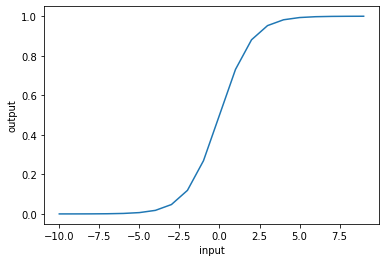

In [14]:
plt.plot(xs, pts)
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [15]:
desiredOutput = [0.1, 0.2, 0.3, 0.4, 0.5]
actualOutput = [0.8, 0.6, 0.5, 0.8, 0.3]

error = [0.0 for i in desiredOutput]
delta = [0.0 for i in desiredOutput]

EPSILON = 0.1   # learning rate
MOMENTUM = 0.01 # a smoothing term

weightUpdate = [[ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0]]

In [16]:
for i in toNodes:
    error[i] = (desiredOutput[i] - actualOutput[i])
    delta[i] = error[i] * actualOutput[i] * (1 - actualOutput[i])
    for j in fromNodes:
        weightUpdate[i][j] = (EPSILON * delta[i] * actualOutput[j]) + (MOMENTUM * weightUpdate[i][j])
        
weightUpdate

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.00512, -0.00384],
 [0.00336, 0.0025199999999999997],
 [0.0, 0.0]]

In [17]:
pip install calysto

     |████████████████████████████████| 82 kB 855 kB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 66 kB 4.5 MB/s 
     |████████████████████████████████| 208 kB 40.5 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=73eb1e2ae5499d75eefe7c0e030d794a896008fc5efdd63547d6ea7fa8058a01
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [18]:
from calysto.ai.conx import *

In [19]:
net = Network()
net.addLayers(2, 3, 1)
net

Conx using seed: 1636465110.1102667


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 3, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  

In [20]:
net.propagate(input=[0, 0])

array('d', [0.4739501920025527])

In [21]:
net.setInputs([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
net.setOutputs([[0.0],[0.0],[0.0],[1.0]])

net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

net.train()

Epoch #     1 | TSS Error: 1.0228 | Correct: 0.0000 | RMS Error: 0.5057
Epoch #     2 | TSS Error: 0.7695 | Correct: 0.0000 | RMS Error: 0.4386
Epoch #     3 | TSS Error: 0.7894 | Correct: 0.7500 | RMS Error: 0.4442
Epoch #     4 | TSS Error: 0.8586 | Correct: 0.7500 | RMS Error: 0.4633
Epoch #     5 | TSS Error: 0.8415 | Correct: 0.7500 | RMS Error: 0.4587
Epoch #     6 | TSS Error: 0.8295 | Correct: 0.7500 | RMS Error: 0.4554
Epoch #     7 | TSS Error: 0.7276 | Correct: 0.0000 | RMS Error: 0.4265
Epoch #     8 | TSS Error: 0.7976 | Correct: 0.0000 | RMS Error: 0.4465
Epoch #     9 | TSS Error: 0.7746 | Correct: 0.0000 | RMS Error: 0.4401
Epoch #    10 | TSS Error: 0.7133 | Correct: 0.0000 | RMS Error: 0.4223
Epoch #    11 | TSS Error: 0.6840 | Correct: 0.2500 | RMS Error: 0.4135
Epoch #    12 | TSS Error: 0.6924 | Correct: 0.2500 | RMS Error: 0.4160
Epoch #    13 | TSS Error: 0.6362 | Correct: 0.2500 | RMS Error: 0.3988
Epoch #    14 | TSS Error: 0.6241 | Correct: 0.2500 | RMS Error:

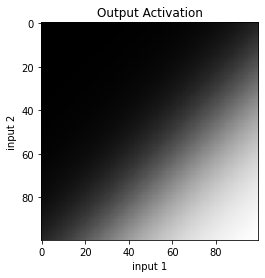

In [22]:
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()